<a href="https://colab.research.google.com/github/dibab64/deeplearning-dibab/blob/main/romancoinsyolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Dec 28 14:46:59 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8rg38VmjzbS5k0FuthU9")
project = rf.workspace("dibab").project("rrc-60")
dataset = project.version(1).download("folder")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to RRC-60-1 in folder:: 100%|██████████| 14365/14365 [00:04<00:00, 3180.92it/s]


In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 7.0 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

In [6]:
model = YOLO("yolov8n-cls.pt")

model.train(data="/content/RRC-60-1", epochs=20)

100%|██████████| 5.28M/5.28M [00:00<00:00, 21.5MB/s]


Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/RRC-60-1, epochs=20, time=None, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

100%|██████████| 6.23M/6.23M [00:00<00:00, 23.5MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/RRC-60-1/train... 12405 images, 0 corrupt: 100%|██████████| 12405/12405 [00:04<00:00, 3019.31it/s]


train: New cache created: /content/RRC-60-1/train.cache
albumentations: RandomResizedCrop(p=1.0, height=224, width=224, scale=(0.5, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.30000000000000004, 1.7], hue=[-0.015, 0.015]), Normalize(p=1.0, mean=(0.0, 0.0, 0.0), std=(1.0, 1.0, 1.0), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpose_mask=False)


val: Scanning /content/RRC-60-1/test... 596 images, 0 corrupt: 100%|██████████| 596/596 [00:00<00:00, 2378.52it/s]

val: New cache created: /content/RRC-60-1/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20     0.528G      4.167         16        224:   6%|▌         | 46/776 [00:03<00:30, 23.82it/s]

       1/20     0.528G      4.133         16        224:  15%|█▍        | 113/776 [00:05<00:26, 24.82it/s]
       1/20     0.528G      4.133         16        224:  15%|█▍        | 116/776 [00:05<00:27, 24.34it/s]
100%|██████████| 755k/755k [00:00<00:00, 4.80MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 26.65it/s]

                   all      0.906      0.982



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 41.53it/s]

                   all       0.96       0.99



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 44.40it/s]

                   all      0.975      0.995



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 43.74it/s]

                   all      0.975      0.993



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 35.94it/s]

                   all       0.97      0.993



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 34.47it/s]

                   all       0.97      0.993



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 35.66it/s]

                   all      0.985      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 45.62it/s]

                   all      0.978      0.995



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 41.51it/s]

                   all      0.985      0.997



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.377G     0.0226          5        224: 100%|██████████| 776/776 [00:25<00:00, 29.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 45.83it/s]

                   all      0.982      0.995



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.514G     0.0215          5        224: 100%|██████████| 776/776 [00:26<00:00, 29.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 44.26it/s]


                   all       0.98      0.995

      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.377G    0.01539          5        224: 100%|██████████| 776/776 [00:26<00:00, 29.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 44.38it/s]

                   all      0.985      0.995



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.377G    0.01316          5        224: 100%|██████████| 776/776 [00:25<00:00, 29.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 43.02it/s]

                   all      0.988      0.997



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.377G   0.009844          5        224: 100%|██████████| 776/776 [00:26<00:00, 29.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 41.65it/s]

                   all      0.987      0.997



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.377G   0.009859          5        224: 100%|██████████| 776/776 [00:25<00:00, 29.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 37.92it/s]

                   all      0.987      0.997



      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.377G   0.007766          5        224: 100%|██████████| 776/776 [00:26<00:00, 29.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 36.72it/s]

                   all      0.988      0.995



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.377G   0.008556          5        224: 100%|██████████| 776/776 [00:26<00:00, 29.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 41.19it/s]

                   all      0.987      0.995



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.377G   0.005659          5        224: 100%|██████████| 776/776 [00:26<00:00, 29.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 41.32it/s]

                   all      0.983      0.997



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.377G   0.004351          5        224: 100%|██████████| 776/776 [00:26<00:00, 29.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 46.53it/s]

                   all      0.985      0.997



      Epoch    GPU_mem       loss  Instances       Size


      20/20     0.377G   0.004212          5        224: 100%|██████████| 776/776 [00:26<00:00, 29.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 47.65it/s]

                   all      0.985      0.997



20 epochs completed in 0.153 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.1MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.1MB

Validating runs/classify/train/weights/best.pt...
Ultralytics YOLOv8.0.230 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1511740 parameters, 0 gradients, 3.4 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/RRC-60-1/train... found 12405 images in 60 classes ✅ 
val: None...
test: /content/RRC-60-1/test... found 596 images in 60 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 19/19 [00:00<00:00, 23.03it/s]


                   all      0.988      0.997
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f15632dfac0>
curves: []
curves_results: []
fitness: 0.9924496710300446
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9882550239562988, 'metrics/accuracy_top5': 0.9966443181037903, 'fitness': 0.9924496710300446}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.13198548515371028, 'inference': 0.945861707597771, 'loss': 0.0004956386233336173, 'postprocess': 0.00042123282515762637}
task: 'classify'
top1: 0.9882550239562988
top5: 0.9966443181037903

In [26]:
model = YOLO("yolov8n-cls.pt")

In [7]:
import pandas as pd

In [23]:
results = pd.read_csv('/content/runs/classify/train/results.csv')

In [27]:
results.mean()

                  epoch    10.500000
             train/loss     0.178451
  metrics/accuracy_top1     0.976930
  metrics/accuracy_top5     0.994462
               val/loss     3.169910
                 lr/pg0     0.000371
                 lr/pg1     0.000371
                 lr/pg2     0.000371
dtype: float64

In [33]:
image = "/content/runs/classify/train/results.png"

In [35]:
from google.colab.patches import cv2_imshow
import cv2

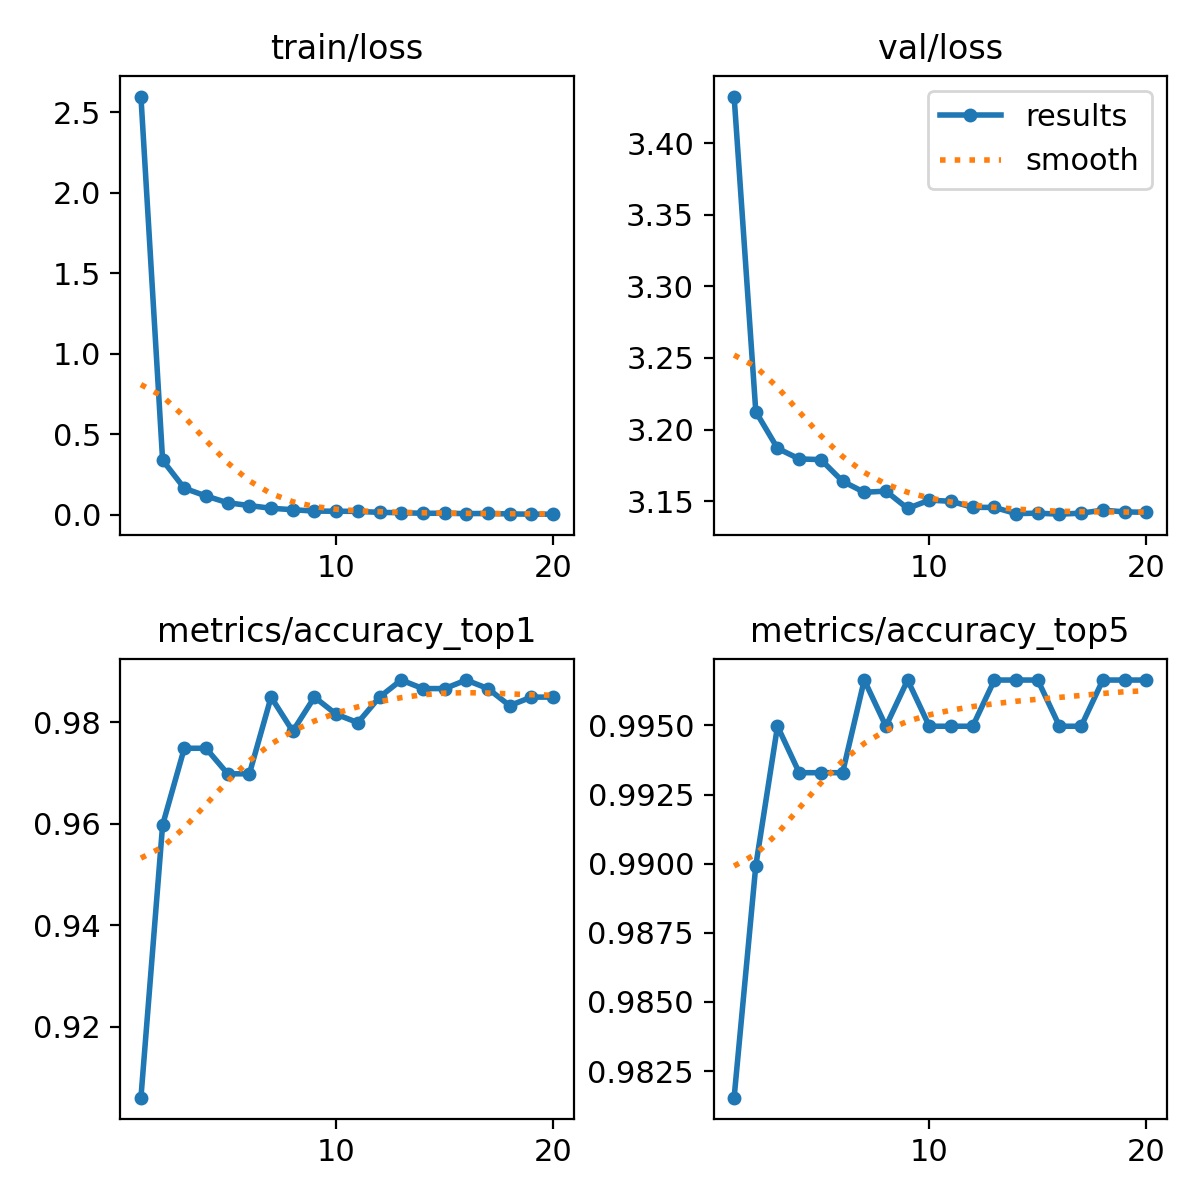

In [36]:
cv2_imshow(cv2.imread(image))